In [1]:
file_path = "/home/chowder/Documents/AiLearning" + \
            "/codingChallenges/kaggle/competitions/gettingStarted" + \
            "/titanic/data/titanic/train.csv"

In [2]:
import pandas as pd
train_df = pd.read_csv(file_path)

/home/chowder/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
1 - train_df["Survived"].mean()

0.6161616161616161

In [5]:
train_df["Sex"].map(lambda x: int(x == "male")).mean()

0.6475869809203143

In [72]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# what percentage of the time was being labled female a correct indicator of surviving
fgender_survived = pd.Series(
    train_df[["Survived", "Sex"]].apply(
        (lambda x:
        int(int(x["Survived"]) == int(x["Sex"] == "female")) 
    ), axis=1)
)
fgender_survived.mean()

0.7867564534231201

In [59]:
# percentage of women who survived
f_df = train_df.loc[train_df["Sex"] == "female"]
f_df.Survived.mean()

0.7420382165605095

In [73]:
train_df.Sex.map(lambda x: x == "male").mean()

0.6475869809203143

In [71]:
# percentage of women in first class
f_df.Pclass.map(lambda x: x == 1).mean()

0.29936305732484075

In [58]:
# percentage of men who survived
m_df = train_df.loc[train_df["Sex"] == "male"]
m_df.Survived.mean()

0.18890814558058924

In [8]:
mgender_survived = pd.Series(
    train_df[["Survived", "Sex"]].apply(
        (lambda x:
        int(int(x["Survived"]) == int(x["Sex"] == "male")) 
    ), axis=1)
)
mgender_survived.mean()

0.2132435465768799

In [9]:
mgender_survived.mean() + fgender_survived.mean()

1.0

In [10]:
# I want to make a proper confusion matrix for the gender classification
from sklearn.metrics import confusion_matrix
y_true = train_df["Survived"]
y_pred = [int(x == "female") for x in train_df["Sex"]]
confusion_matrix(y_true, y_pred)
# assigned gender being female seems to have worse negitive perdictive vale tha PPV

array([[468,  81],
       [109, 233]])

In [11]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y_true, y_pred)

array([[468,  81],
       [109, 233]])

In [12]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y_true, y_pred)

0.2288292030088857

In [13]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7103658536585367

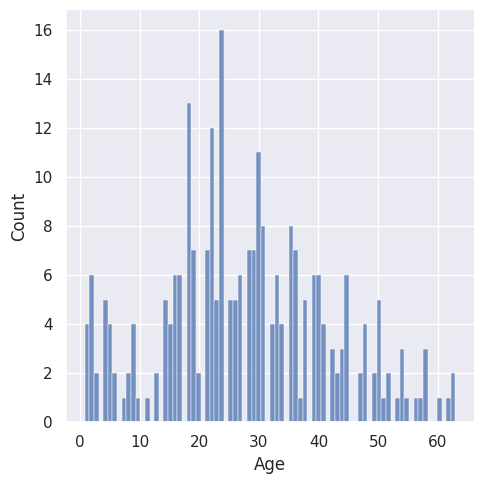

In [24]:
import seaborn as sns

sns.displot((train_df.loc[train_df["Sex"] == "female"]).Age, bins=80)

<Axes: xlabel='Age', ylabel='Count'>

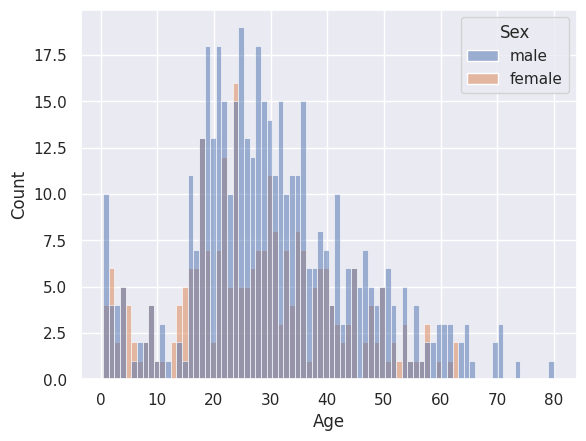

In [29]:

sns.histplot(data=train_df, x="Age", hue="Sex", bins=80)

<Axes: xlabel='Age', ylabel='Density'>

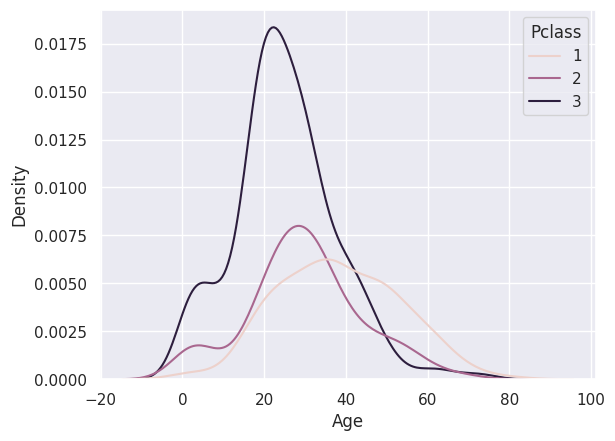

In [32]:
sns.kdeplot(data=train_df, x="Age", hue="Pclass")

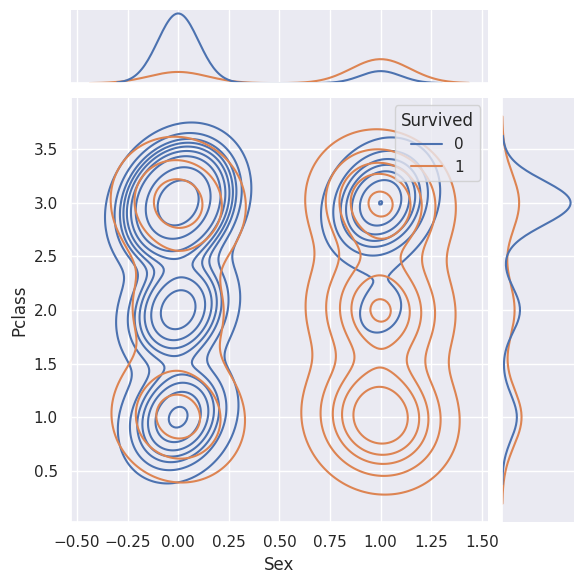

In [39]:
sns.jointplot(data = train_df, x=train_df["Sex"] == "female", y="Pclass", hue="Survived", kind="kde")

<Axes: xlabel='Sex', ylabel='Pclass'>

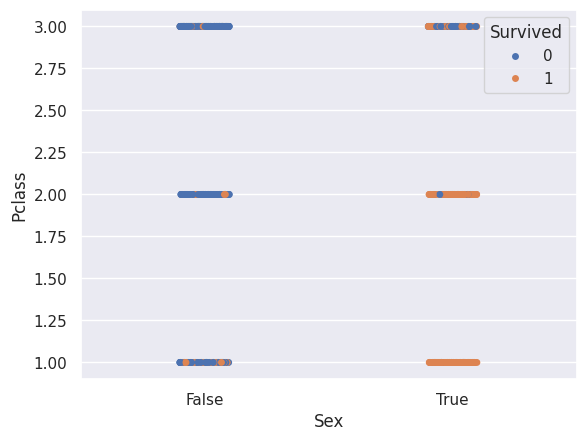

In [53]:
sns.stripplot(data = train_df, x=train_df["Sex"] == "female", y="Pclass", hue="Survived")

In [52]:
# I wanna calculate some probabilities

# P(survived)
print(f"Probaility that you survived is {train_df.Survived.mean():.2f}")
print(f"and the inverse is {1 - train_df.Survived.mean():.2f}")

#P(labeled Female)
precentF = (train_df["Sex"] == "female").mean()
print(f"the probility you were labeled female and on the boat was {precentF:.2f}")
print(f"the inverse, being labeld male and on the boat is {1 - precentF:.2f}")

# P of being in each one of the classes
percentC1 = (train_df["Pclass"] == 1).mean()
percentC2 = (train_df["Pclass"] == 2).mean()
percentC3 = (train_df["Pclass"] == 3).mean()
print(f"P of being in class 1 is {percentC1:.2f}")
print(f"P of being in class 2 is {percentC2:.2f}")
print(f"P of being in class 3 is {percentC3:.2f}")

Probaility that you survived is 0.38
and the inverse is 0.62
the probility you were labeled female and on the boat was 0.35
the inverse, being labeld male and on the boat is 0.65
P of being in class 1 is 0.24
P of being in class 2 is 0.21
P of being in class 3 is 0.55


In [ ]:
# I feel like there should be a faster an more automated way of generating these Probabilites
# in like am exponentially growing table

# for example a contingency table with marginal proabilites, would then become a 
# contingency cube with 3 related probailites <- cut into slices would be a cTable line

# with  4 items it would be a table of tables

In [ ]:
# my real question is what factors are most important to survival
# this could be done with the mutial information from each column
# it could also be done using a greedy decision tree

In [74]:
train_df.Embarked.describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [114]:
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked' ]

# turn Sex and Embarked into numbers
from sklearn.preprocessing import OrdinalEncoder

X = train_df[features].copy()
y = X["Survived"]
X.drop(['Survived'], axis=1, inplace=True)
ordinal_encoder = OrdinalEncoder()

X[features[1:]] = ordinal_encoder.fit_transform(X)
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [115]:
# it looks like we have a bunch of missing ages, lets impute them
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

X_train_imp = pd.DataFrame(imp.fit_transform(X))
X_train_imp.columns = X.columns
X_train_imp.isnull().sum()


Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

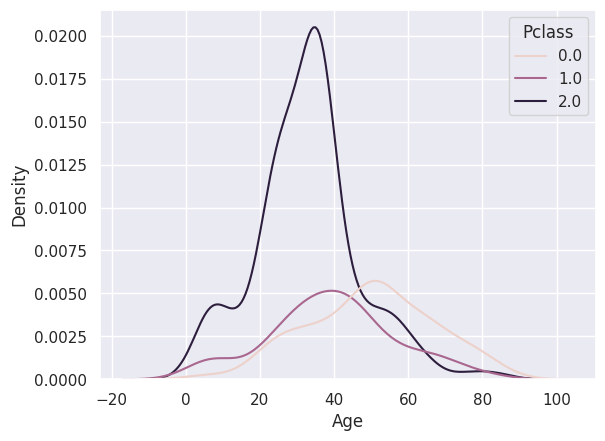

In [116]:
sns.kdeplot(data=X_train_imp, x="Age", hue="Pclass")

In [120]:


from sklearn.tree import DecisionTreeRegressor
#specify the model. 

#For model reproducibility, set a numeric value for random_state when specifying the model
my_dt = DecisionTreeRegressor(random_state=1, max_depth=4)

# Fit the model
my_dt.fit(X_train_imp,y)

#p4
predictions = my_dt.predict(X_train_imp)


In [118]:
X_train_imp.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

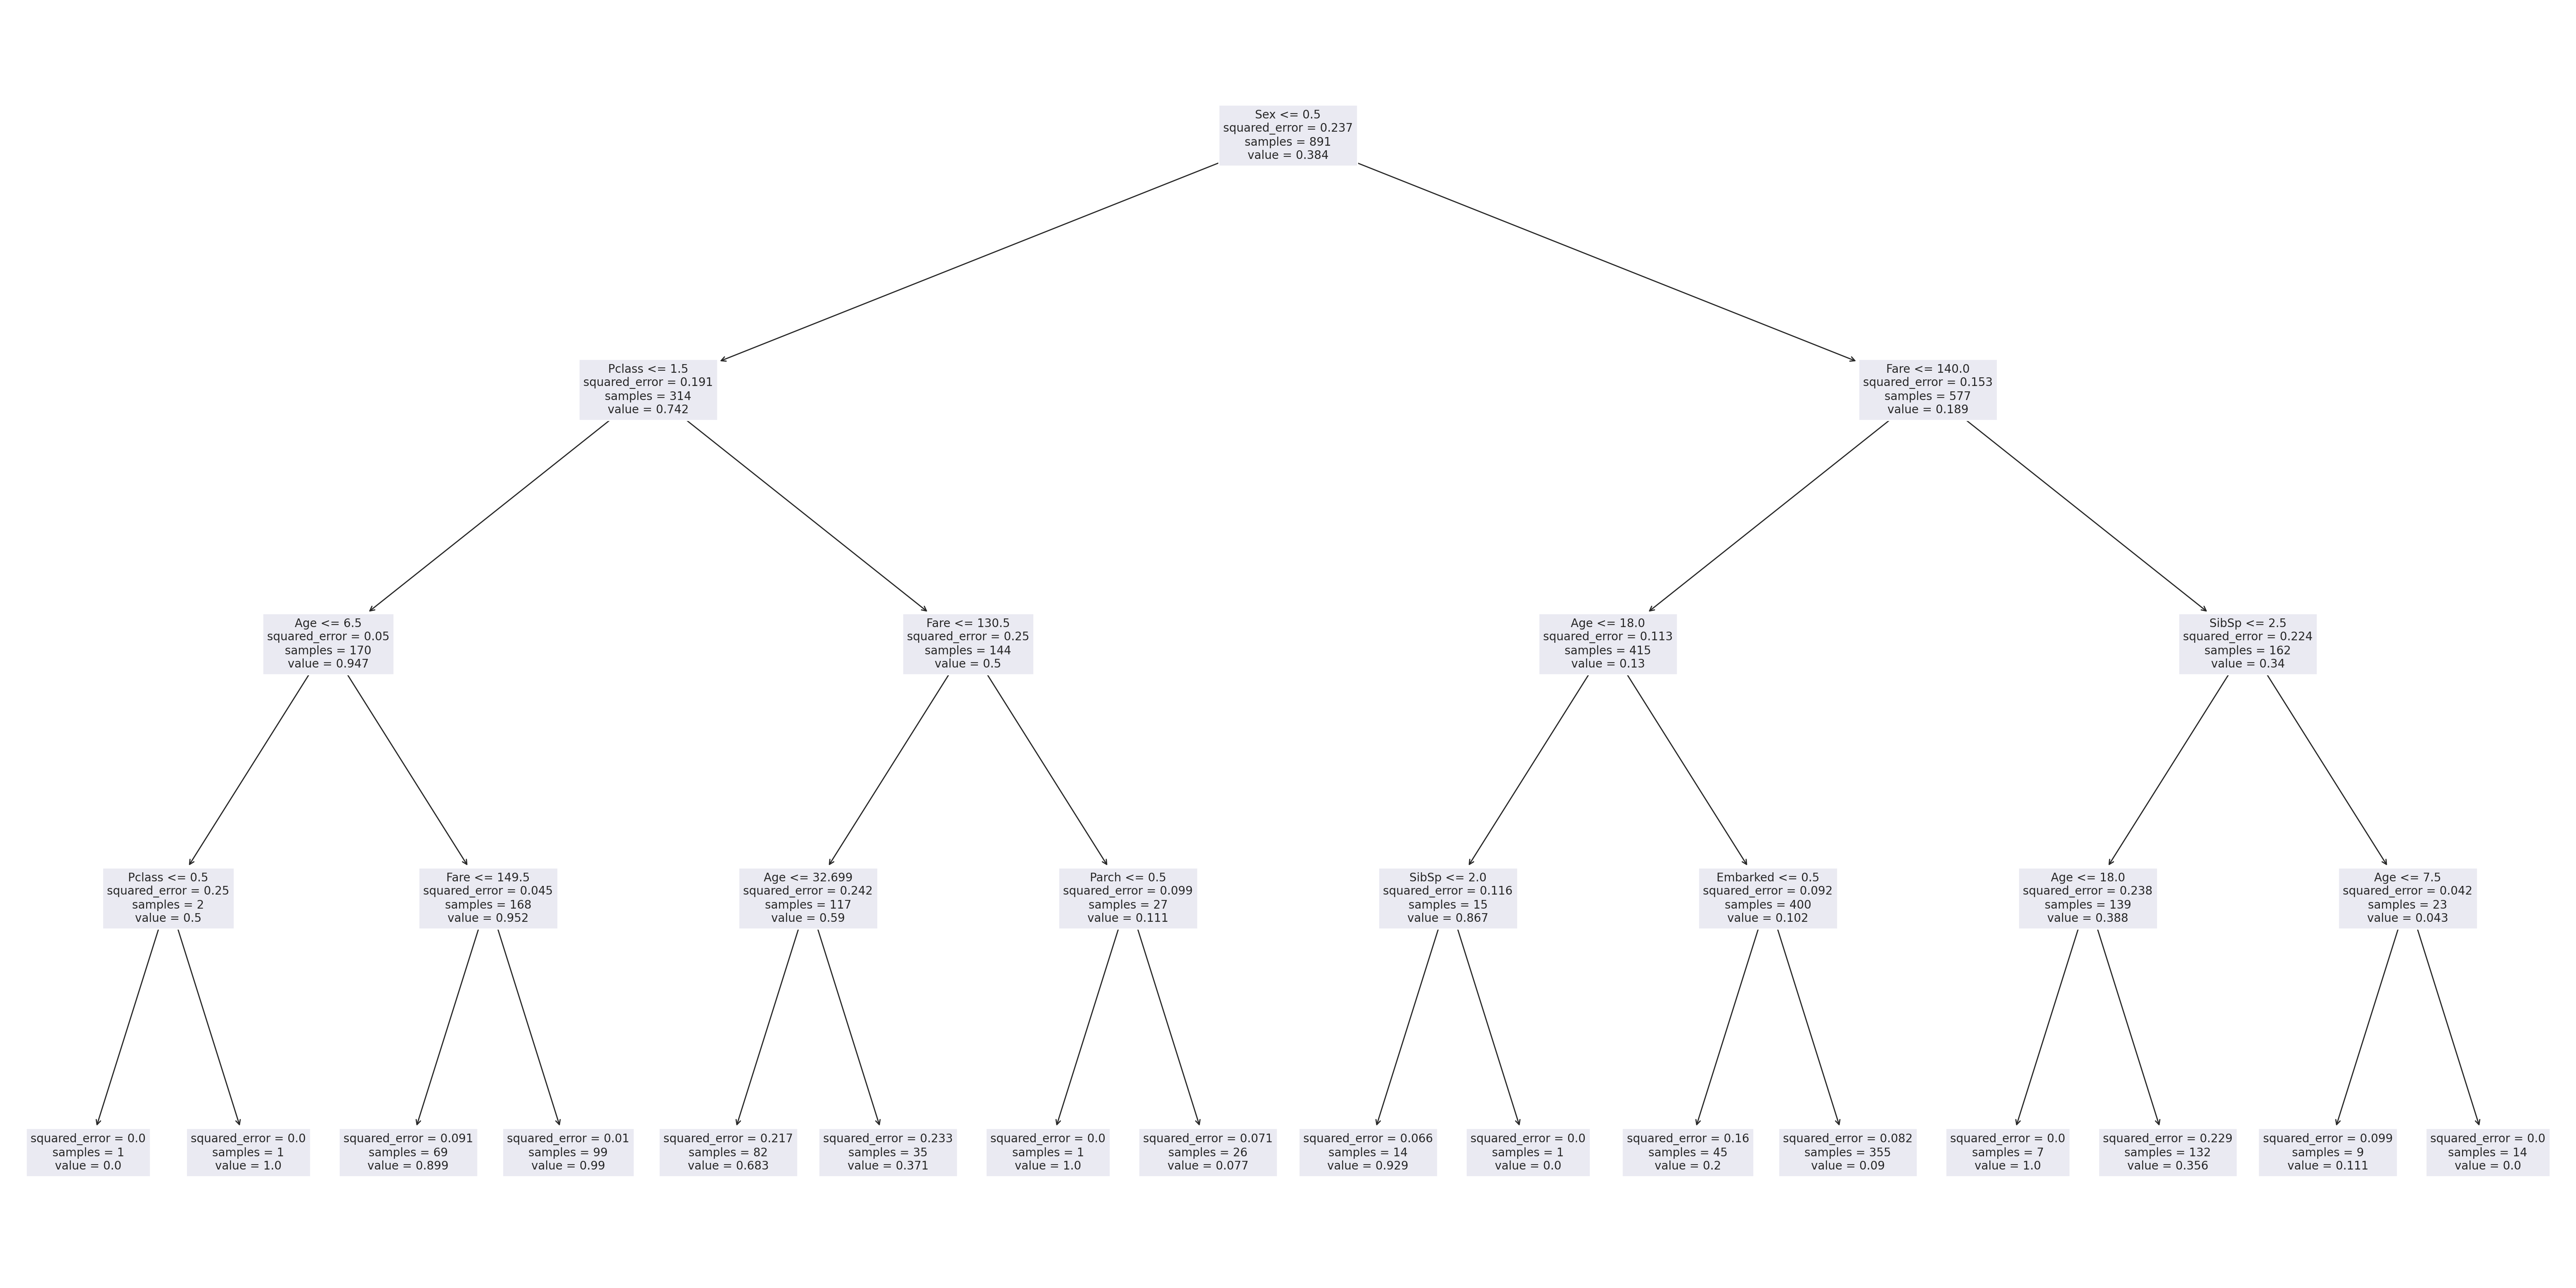

In [122]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20), dpi=200)  # set plot size (denoted in inches)
tree.plot_tree(my_dt, feature_names=X_train_imp.columns, fontsize=10)
plt.show()


In [ ]:
# I would like a mutal infromation heatmap of each row and each column


In [145]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    # mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [128]:
mi_scores = make_mi_scores(X_train_imp, y)
print(mi_scores)

Sex         0.161437
Fare        0.128763
Age         0.088662
Embarked    0.035435
SibSp       0.027855
Pclass      0.020778
Parch       0.003546
Name: MI Scores, dtype: float64


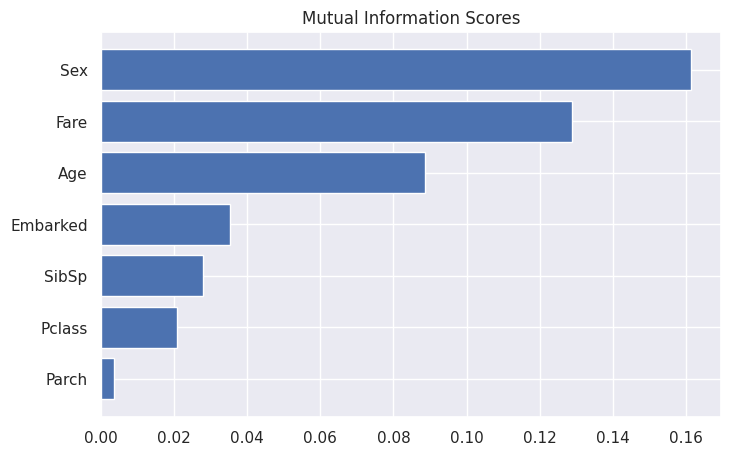

In [129]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [177]:
# turn a series into a row of a DF
mutual_data_df = X_train_imp.copy()
mutual_data_df["Survived"] = y

mutual_info_df = pd.DataFrame(columns=mutual_data_df.columns)

for col in mutual_data_df.columns:
    mi_scores = make_mi_scores(mutual_data_df, mutual_data_df[col])
    mi_scores.name = col
    #mi_scores_df = pd.DataFrame(mi_scores.transpose(), index=[col], columns=mi_scores.index)
    #print(mi_scores)
    #print(mi_scores_df)
    # mi_score_df["index"] = col
    mutual_info_df = pd.concat([mi_scores, mutual_info_df], axis=1)

In [181]:
mutual_info_df = mutual_info_df.dropna(axis=1)

In [182]:
mutual_info_df

,Survived,Embarked,Fare,Parch,SibSp,Age,Sex,Pclass
Pclass,0.020778,0.029412,0.845766,0.012169,0.048247,0.190464,0.009534,0.987204
Sex,0.161437,0.000000,0.078166,0.067712,0.044582,0.069501,0.684614,0.000000
Age,0.088662,0.181859,0.368381,0.181932,0.185591,4.305695,0.095402,0.182450
SibSp,0.027855,0.036532,0.381617,0.113193,0.925482,0.173718,0.031437,0.000000
Parch,0.003546,0.004632,0.277626,0.792692,0.123836,0.176638,0.034958,0.000000
Fare,0.128763,0.446874,4.475909,0.281239,0.385550,0.379504,0.096954,0.816215
Embarked,0.035435,0.778366,0.462706,0.025183,0.025829,0.145768,0.002230,0.076565
Survived,0.666473,0.020105,0.123952,0.026736,0.024346,0.065690,0.126269,0.020093


[Text(0.5, 0, 'Survived'),
 Text(1.5, 0, 'Embarked'),
 Text(2.5, 0, 'Fare'),
 Text(3.5, 0, 'Parch'),
 Text(4.5, 0, 'SibSp'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'Sex'),
 Text(7.5, 0, 'Pclass')]

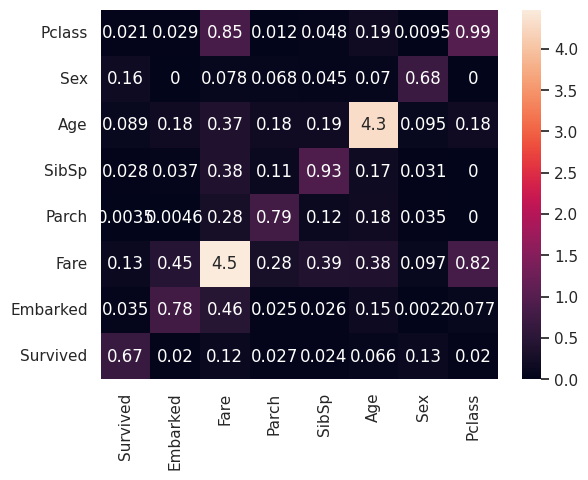

In [183]:



my_plot = sns.heatmap(data=mutual_info_df, annot=True) # Your code here

my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)